# Assingment 1 - Malaria Cell Image Classification
### Course: Convolutional Neural Networks with Applications in Medical Image Analysis
Office hours: Mondays 13.15--15.00 (Tommy), Tuesdays 13.15--16.00 (Minh), Thursdays 08.15--12.00 (Attila)

Welcome. The first assignment is based on images on classifying images of cells whether they are parasitized or uninfected of malaria. It is based on a dataset available from Lister Hill National Center for Biomedical Communications (NIH) from the link: https://lhncbc.nlm.nih.gov/publication/pub9932 . The data was preprocessed and organized for easier machine learning applications.

Your task is to look through the highly customizable code which contains all the main steps for high accuracy classification, and optimize it. The most important issues with the current code are noted in the comments for easier comprehension. A list of tasks for the report is listed above:
- Reach an accuracy of 96%.
- Plot the training/validating losses and accuracies. Describe where to stop training.
- Show the thought process behind building your model and choosing your parameters.
- Describe what you think the biggest issues are with the current setup, and how to solve them.

In [1]:
# Import necessary packages for building the datasets

import numpy as np # Package for matrix operations, handling data
import pandas as pd # package for file reading
import os
import cv2
import matplotlib.pyplot as plt # Package for plotting
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

# Path to dataset downloaded from the provided link
data_path = "cell_images" # Path to dataset

In [2]:
# Check out dataset
parasitized_data = os.listdir(data_path + '/Parasitized/')
print(parasitized_data[:2]) #the output we get are the .png files
print("Number of parasitized images: " + str(len(parasitized_data)) + '\n')
uninfected_data = os.listdir(data_path + '/Uninfected/')
print(uninfected_data[:2])
print("Number of non-paratisized images: " + str(len(uninfected_data)))

# NOTE: The images are of format .png, they will have to be loaded individually and handled accordingly.

['C99P60ThinF_IMG_20150918_141129_cell_118.png', 'C186P147NThinF_IMG_20151203_150322_cell_164.png']
Number of parasitized images: 13780

['C117P78ThinF_IMG_20150930_214941_cell_61.png', 'C206ThinF_IMG_20151029_140917_cell_213.png']
Number of non-paratisized images: 13780


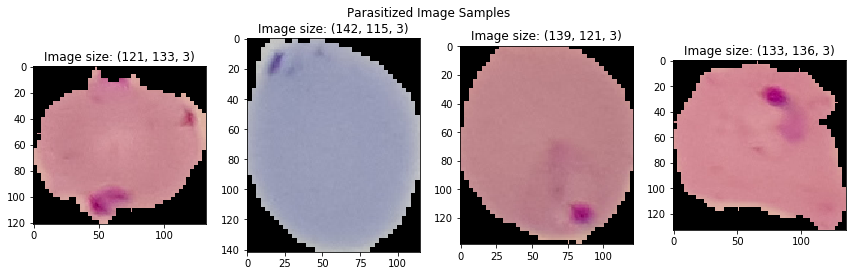

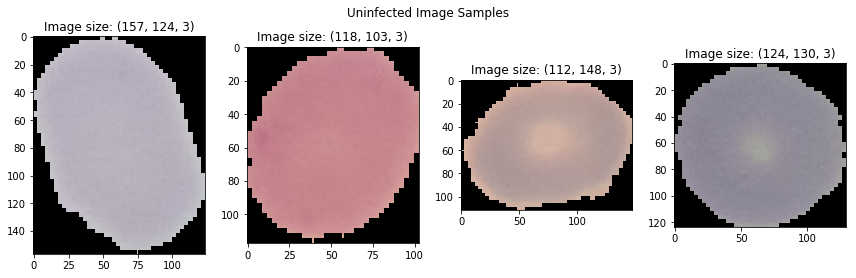

In [3]:
# Look at some sample images
plt.figure(figsize = (12,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = plt.imread(data_path + '/Parasitized/' + parasitized_data[i])
    plt.imshow(img)
    plt.title('Image size: ' + str(np.shape(img)))
    plt.tight_layout()
    
plt.suptitle('Parasitized Image Samples')
plt.show()

plt.figure(figsize = (12,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = plt.imread(data_path + '/Uninfected/' + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Image size: ' + str(np.shape(img)))
    plt.tight_layout()
    
plt.suptitle('Uninfected Image Samples')
plt.show()

# NOTE: The images are of different size. Also they are RGB.

In [4]:
# Create dataset for machine learning purposes.

height = 16
width = 16
# NOTE: The size of the new images is very important.
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread(data_path + '/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (height, width))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(data_path + '/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (height, width))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

# NOTE: labels are 1 if the corresponding image is paratisized, 0 if not.

In [5]:
image_data = np.array(data)
labels = np.array(labels)

# Shuffle data
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

# Sizes of datasets
print(np.shape(image_data))
print(np.shape(labels))

# NOTE: This is not a lot of images.

(27558, 16, 16, 3)
(27558,)


In [6]:
# Split dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.05, random_state = 101)

# NOTE: The ratio of the data for training-testing is very important. The split should be reproducible.

# Split testing dataset into testing and validation
x_test, x_val = x_test[0:int(len(x_test)/2), :], x_test[int(len(x_test)/2):, :]
y_test, y_val = y_test[0:int(len(y_test)/2)], y_test[int(len(y_test)/2):]

# Two samples from the testing set for heatmapping
x_call, y_call = x_test[[np.argmin(y_test), np.argmax(y_test)]], y_test[[np.argmin(y_test), np.argmax(y_test)]]

# NOTE: Pick one parasitized and one uninfected too.

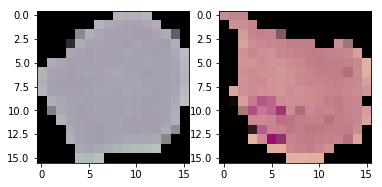

In [7]:
plt.subplot(121)
plt.imshow(x_call[0, :, :, :])
plt.subplot(122)
plt.imshow(x_call[1, :, :, :])
plt.show()

In [8]:
# Make the labels keras-friendly
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [15]:
# A quick summary of the data:
print('Training image size: ' + str(x_train.shape))
print('Testing image size: ' + str(x_test.shape))
print('Validating image size: ' + str(x_val.shape))
print('Training label size: ' + str(y_train.shape))
print('Testing label size: ' + str(y_test.shape))
print('Validating label size: ' + str(y_val.shape))

Training image size: (26180, 16, 16, 3)
Testing image size: (689, 16, 16, 3)
Validating image size: (689, 16, 16, 3)
Training label size: (26180, 2)
Testing label size: (689, 2)
Validating label size: (689, 2)


In [16]:
# Import packages important for building and training your model.

import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [17]:
def build_model(height, width, classes, channels):
    model = Sequential()
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(8, (4,4), strides=(2, 2), input_shape = inputShape, name='hotmap'))
    model.add(Conv2D(8, (1,1), strides=(2, 2)))

    model.add(Flatten())    
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(classes, activation = 'relu'))
    
    return model

# NOTE: Look at the imported layers in the previous cell. Feel free to use them.
# NOTE: Are you satisfied with the model being sequential? Feel free to experiment.
# NOTE: The first activation layer is named 'hotmap' for further use for heatmapping.
# NOTE: What activation are you using on the output layer? What range will your output have?

In [18]:
# Build your model.

classes = 2
channels = 3
model = build_model(height = height, width = width, classes = classes, channels = channels)
print('Size of the model input: ' + str(model.input.shape))
model.summary()

# NOTE: Are the input sizes correct?
# NOTE: Are the output sizes correct?
# NOTE: Is the 'hotmap' activation layer in the model?
# NOTE: Try to imagine the model layer-by-layer and think it through. Is it doing something reasonable?
# NOTE: Are the model parameters split "evenly" between the layers? Or is there one huge layer?
# NOTE: Will the model fit into memory? Is the model too small? Is the model too large?

Size of the model input: (None, 16, 16, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hotmap (Conv2D)              (None, 7, 7, 8)           392       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 8)           72        
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 132,434
Trainable params: 132,434
Non-trainable params: 0
_____

In [19]:
# Compile the model, try out different optimizers
learning_rate = 0.01
optim = optimizers.SGD(lr = learning_rate)
model.compile(loss = 'mean_squared_error', optimizer = optim, metrics = ['accuracy'])

# NOTE: Are you satisfied with the loss function?
# NOTE: Are you satisfied with the metric?
# NOTE: Are you satisfied with the optimizer and its parameters?

In [ ]:
#fit the model onto the dataset
batch_size = 2048
n_epochs = 1000

h = model.fit(x_train, y_train, epochs = n_epochs, batch_size = batch_size)

# NOTE: Plotting the accuracies and losses helps a lot.
# NOTE: What does plotting the training data tell you? Should you plot something else?
# NOTE: What should one do with the validation data?
# NOTE: When should one stop? Did you overtrain? Did you train for long enough?
# NOTE: Think about implementing Early Stopping?

Train on 26180 samples
Epoch 1/1000
26180/26180 [==============================] - 0s 15us/sample - loss: 0.2696 - accuracy: 0.5092
Epoch 2/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2555 - accuracy: 0.5192
Epoch 3/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2535 - accuracy: 0.5363
Epoch 4/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2517 - accuracy: 0.5516
Epoch 5/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2501 - accuracy: 0.5620
Epoch 6/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2486 - accuracy: 0.5727
Epoch 7/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2473 - accuracy: 0.5790
Epoch 8/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2461 - accuracy: 0.5856
Epoch 9/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2451 - accuracy: 0.5885
Epoc

26180/26180 [==============================] - 0s 8us/sample - loss: 0.2189 - accuracy: 0.6521
Epoch 77/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2187 - accuracy: 0.6530
Epoch 78/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2183 - accuracy: 0.6534
Epoch 79/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2183 - accuracy: 0.6524
Epoch 80/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2181 - accuracy: 0.6530
Epoch 81/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2177 - accuracy: 0.6540
Epoch 82/1000
26180/26180 [==============================] - 0s 7us/sample - loss: 0.2176 - accuracy: 0.6533
Epoch 83/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2176 - accuracy: 0.6535
Epoch 84/1000
26180/26180 [==============================] - 0s 8us/sample - loss: 0.2171 - accuracy: 0.6567
Epoch 85/1000
26180/26180 [======

In [ ]:
# Heatmap function
from tf_explain.core.grad_cam import GradCAM

class_index = 0
explainer = GradCAM()
# Compute GradCAM on VGG16
grid = explainer.explain((x_call, y_call), model, class_index=class_index, layer_name="hotmap")
plt.imshow(np.sum(grid, axis=2), cmap='bwr')
plt.colorbar()
plt.show()

# NOTE: We look at the activation function of the layer called 'hotmap' from the model.
# NOTE: What does this image mean?

In [ ]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ' + str(predictions[0]))
print('Test accuracy: ' + str(predictions[1]))


# NOTE: Is this high enough? How about implementing data augmentation?